# Exploratory Data Analysis

#### Importing the required Python Libraries 

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

#### Importing Preprocessed dataset

In [48]:
df= pd.read_csv('Stroke_data.csv')
df.columns

Index(['gender_Male', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes', 'stroke'],
      dtype='object')

In [32]:
df.head()

,gender_Male,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,1,67.0,0,1,1,0,228.69,36.6,0,1,0,0,1,0,0,1
1,0,61.0,0,0,1,1,202.21,28.1,0,0,1,0,0,1,0,1
2,1,80.0,0,1,1,1,105.92,32.5,0,1,0,0,0,1,0,1
3,0,49.0,0,0,1,0,171.23,34.4,0,1,0,0,0,0,1,1
4,0,79.0,1,0,1,1,174.12,24.0,0,0,1,0,0,1,0,1


#### Plotting Null Values if Any...

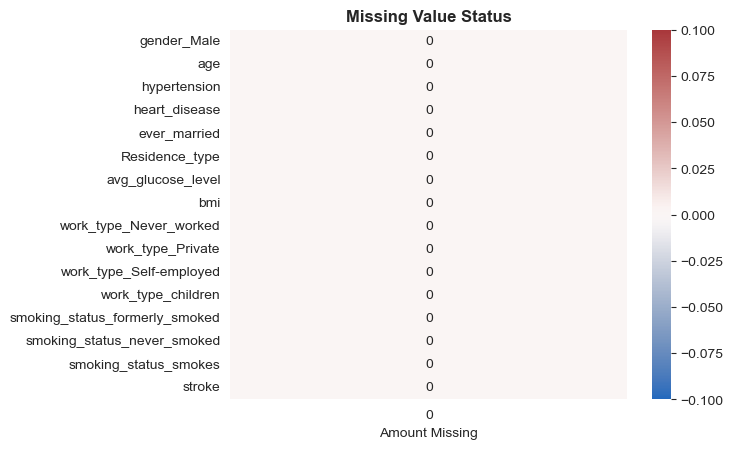

In [33]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

#### Stroke Proportion Plot

In [34]:
fig = ex.pie(df,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples<b>')
fig.show()


#### Age Sex Inference

In [35]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,                                      
          ]
)
fig.add_trace(
    go.Pie(values=df.gender_Male.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.query('gender_Male==0').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=df.query('gender_Male==1').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence<b>",)

fig.show()

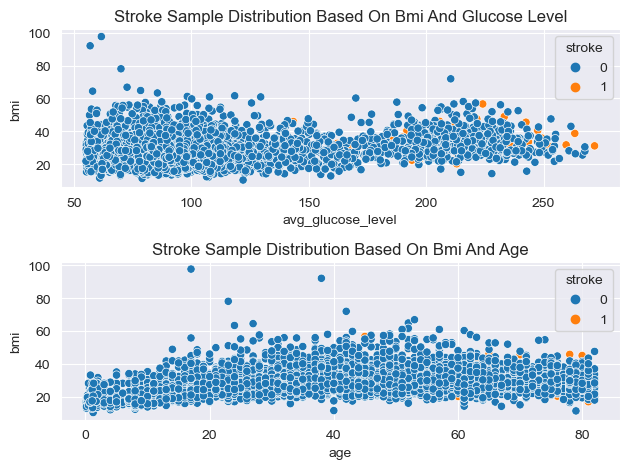

In [41]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.tight_layout()


C:\Users\hp\AppData\Local\Temp\ipykernel_34128\983519971.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hp\AppData\Local\Temp\ipykernel_34128\983519971.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\hp\AppData\Local\Temp\ipykernel_34128\983519971.py:2: UserWarning:



`distplot` is a deprecate

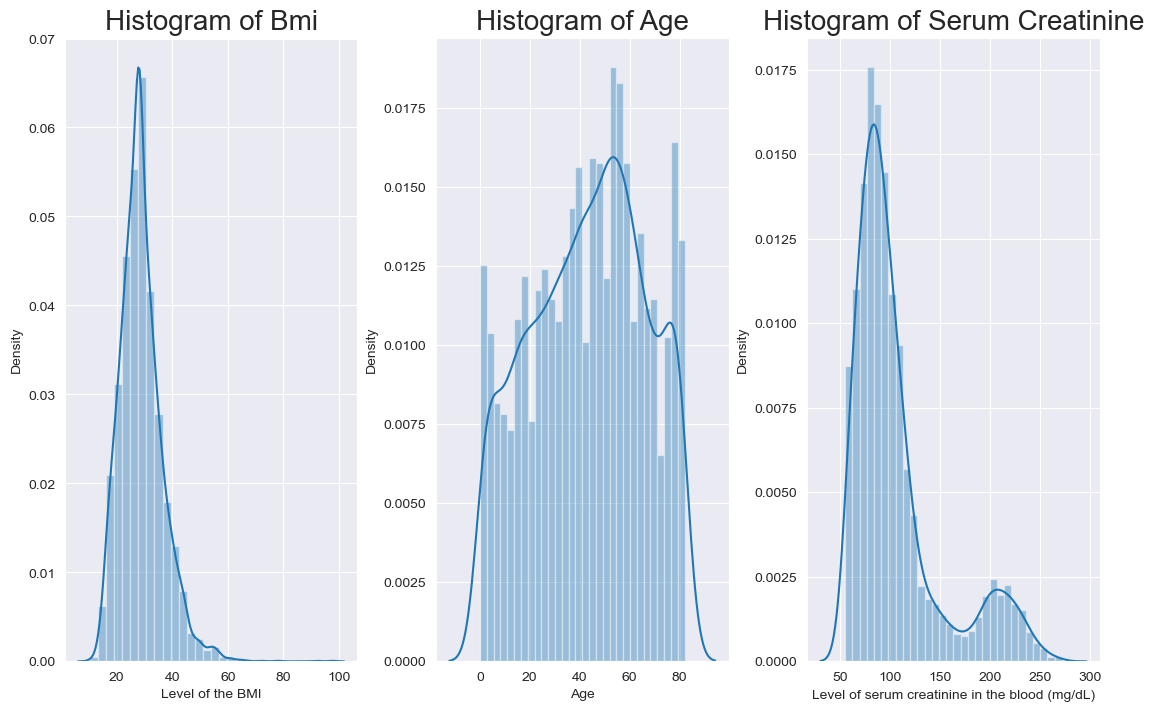

In [44]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()

<Figure size 1700x700 with 0 Axes>

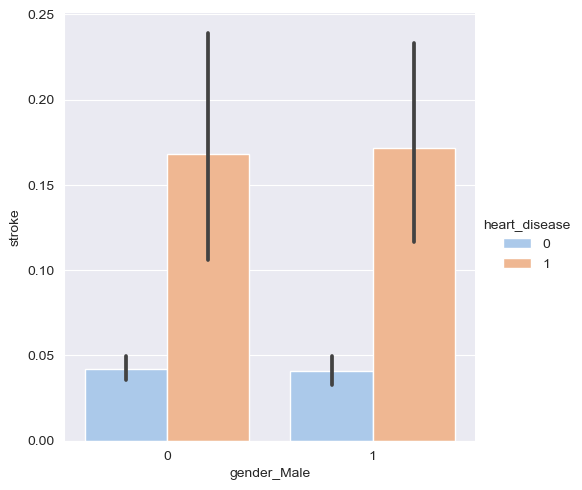

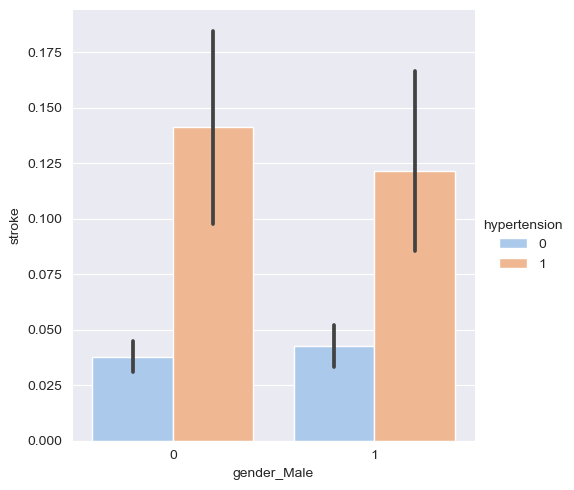

In [46]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender_Male", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender_Male", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

#### Age Vs Stroke 

In [47]:
len_data = len(df)
len_w = len(df[df["gender_Male"]==1])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender_Male']==1)])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender_Male']==0)])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

#### Correation Feature Ploting

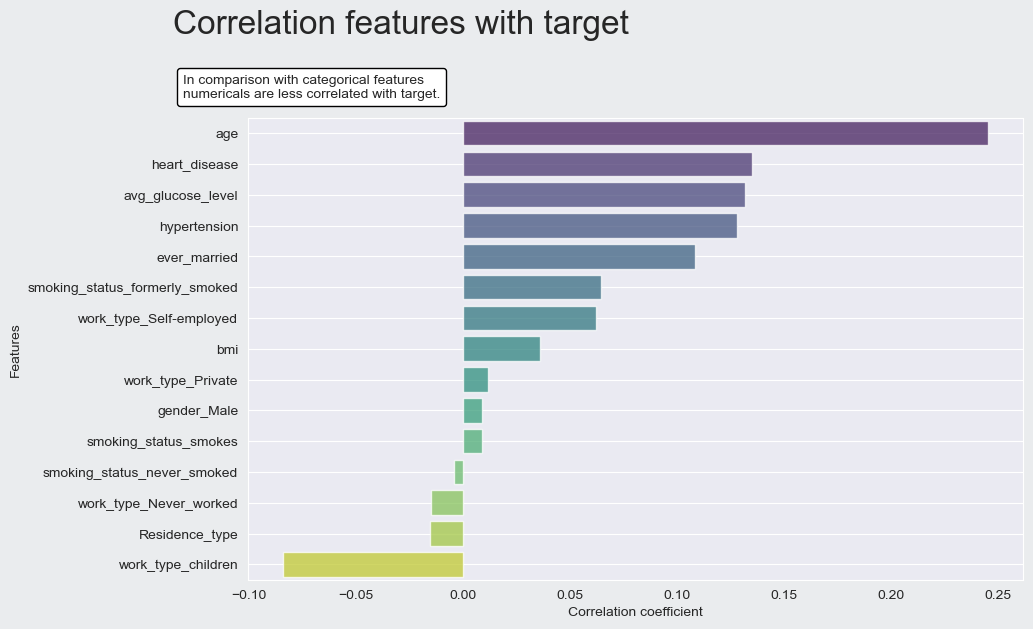

In [51]:
features=['gender_Male', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = df["stroke"]
    x = df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

#### Correalation Matrix

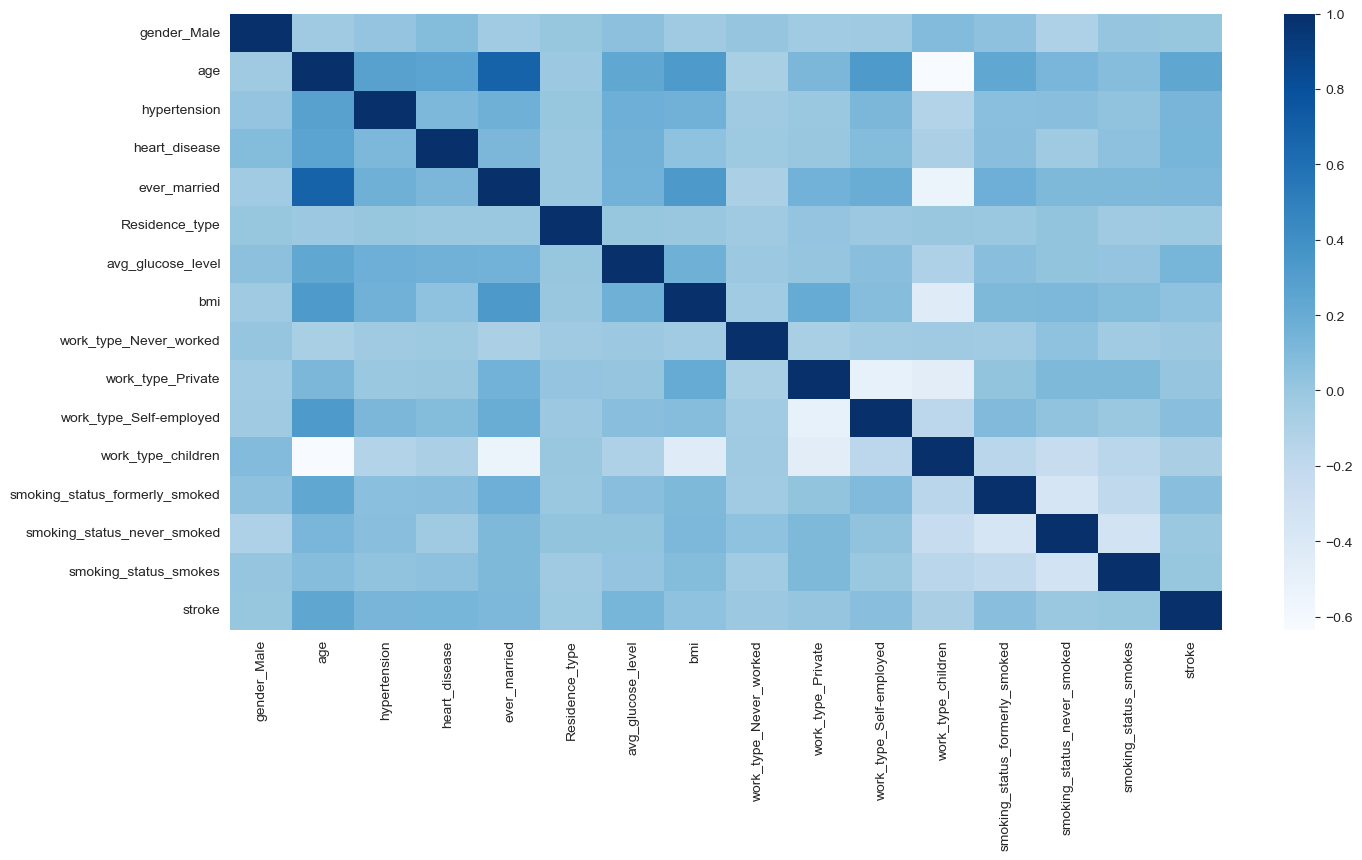

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap="Blues");

#### Feature Ranking Plot

Feature ranking:
1. feature 1 (0.269180)
2. feature 6 (0.264944)
3. feature 7 (0.232426)
4. feature 5 (0.036126)
5. feature 0 (0.033708)
6. feature 3 (0.025917)
7. feature 2 (0.025516)
8. feature 9 (0.020547)
9. feature 13 (0.020058)
10. feature 4 (0.019033)
11. feature 14 (0.018304)
12. feature 10 (0.016468)
13. feature 12 (0.016285)
14. feature 11 (0.001441)
15. feature 8 (0.000047)


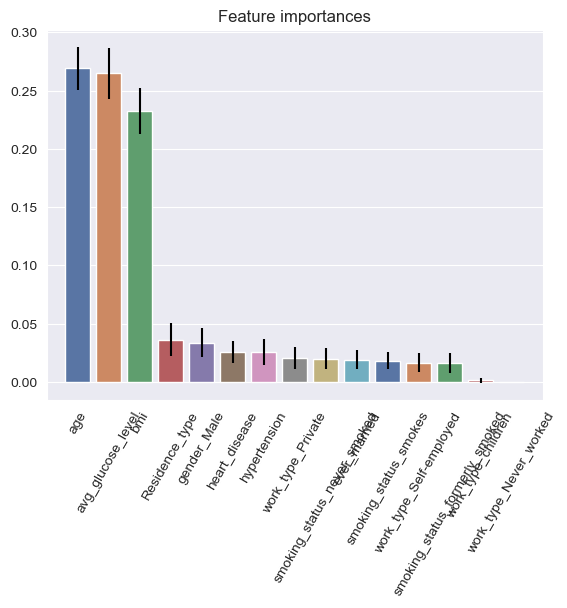

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

X = df[features]
y = df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

## From this plot we can clearly see the most importtant features:                                                                              
 #### **--> Age**
 #### **--> avg_glucose_level**
 ####  **--> bmi**
    